In [1]:
from differentialEvolution import DifferentialEvolution
from env import Env
from qLearningSolver import QLearningSolver
from train import train_qsolver
import numpy as np
import matplotlib.pyplot as plt
import cec2017.functions as functions
from cec2017.utils import surface_plot
import time

## Functions

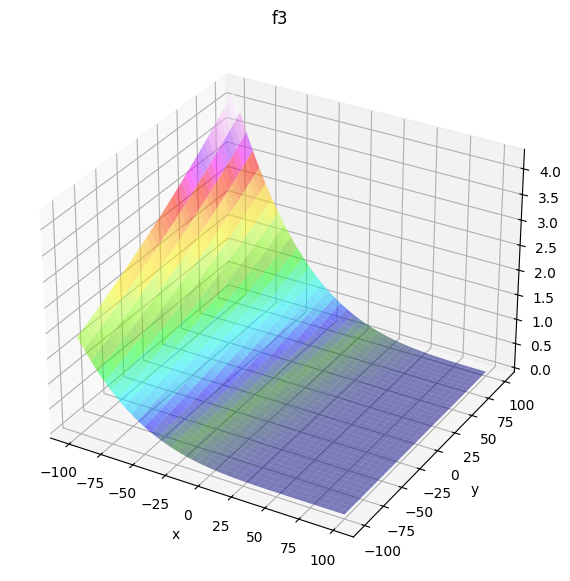

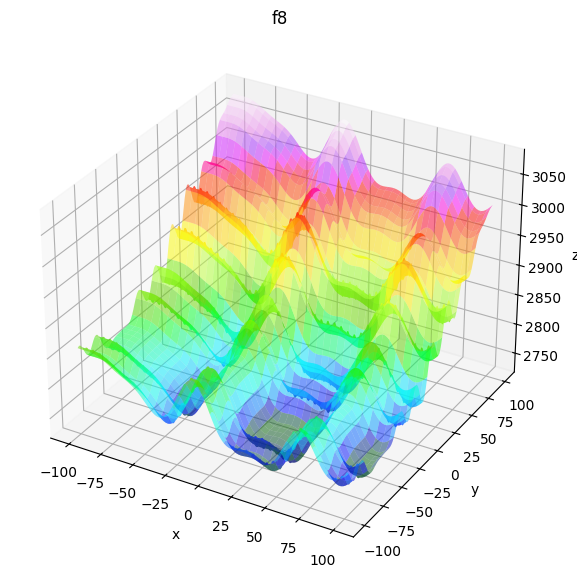

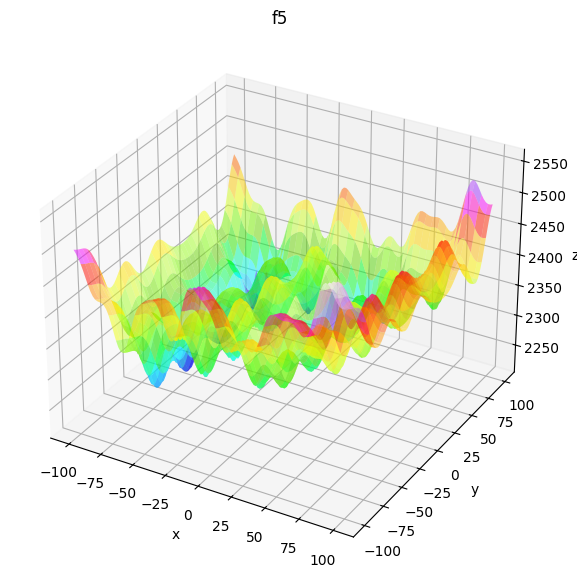

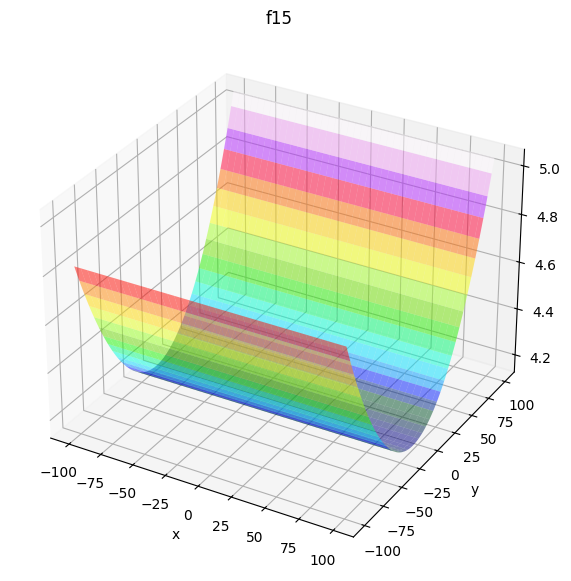

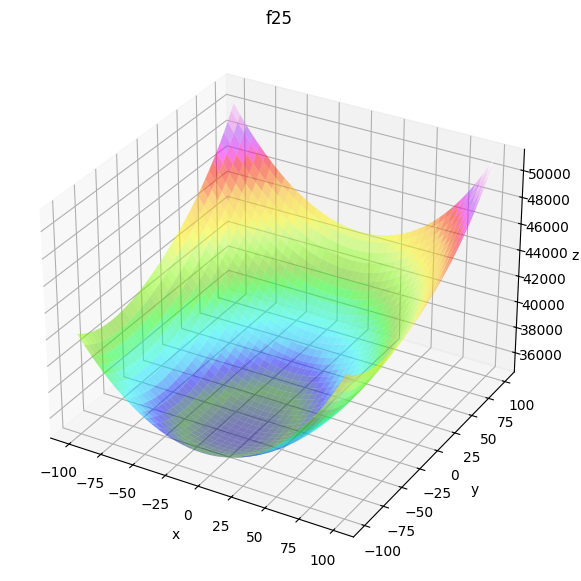

In [2]:
my_functions = []
f1 = functions.f3
f2 = functions.f8
f3 = functions.f5
f4 = functions.f15
f5 = functions.f25

# for f in [f1, f2, f3, f4, f5]:
#     surface_plot(f, points=120, dimension=100)

## Normal differential evolution

In [ ]:
def plot_de_result(func):
    DE = DifferentialEvolution(
        objective_fun=func,
        popul_size=100,
        crossover_rate=0.5,
        max_iterations=100,
        bounds=(-100, 100),
        dimension=10,
        F=0.8,
        selection = 'best', #'rand',
        num_diff = 1  #2
    )
    start_time = time.time()
    # Uruchomienie ewolucji
    result, result_point, state = DE.evolve()

    end_time = time.time()

    # Obliczamy czas wykonania funkcji
    execution_time = end_time - start_time

    surface_plot(func, points=120, dimension=100, x1=result_point[0], 
                        x2=result_point[1], y=result, ax=None)
    # figRos.scatter(result_point[0], result_point[1], result, color='red')
    # plt.show()

    print("Czas wykonania funkcji:", execution_time, "sekund.")
    print("Najlepszy wynik:", result)
    print("Najlepsze rozwiązanie:", result_point)
    print("Stan:", state)

plot_de_result(f1)
plot_de_result(f2)
plot_de_result(f3)
# plot_de_result(f4)
plot_de_result(f5)

## Training QLearningSolver

In [3]:
# Inicjalizacja środowiska
env_handler = Env(f1, 100, 20, 10)

observation_space = env_handler.observation_space
q_params = [0.5, 0.9, 0.1]


# Inicjalizacja solvera
q_solver = QLearningSolver(observation_space,
                        q_params[0], q_params[1], q_params[2])

In [7]:
q_solver = train_qsolver(q_solver, env_handler, 4000, True, True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# DE with QSolver agent